In [1]:
import os
import sys

sys.path.append(os.path.realpath('..'))

import google.auth


import pandas as pd
pd.options.display.max_colwidth = 100

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

def keth(x, pos):
    'The two args are the value and tick position'
    return '%1.fK' % (x * 1e-3)
keth_formatter = FuncFormatter(keth)

import pandas_gbq
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file('/Users/ankitchiplunkar/.config/gcloud/.gcloud.json')
pandas_gbq.context.project = 'frontier0x'
pandas_gbq.context.credentials = credentials

### Calculate effective gas price

In [2]:
pd.read_gbq("""
select * from frontier0x.research.cefidefi_q12023 limit 10
""")




,transaction_hash,token_address_1,token_value_1,token_address_2,token_value_2,num_tokens,num_transfers,block_timestamp,hash,from_address,...,base_fee_per_gas,receipt_gas_used,receipt_effective_gas_price,max_priority_fee_per_gas,proposer_payment,effective_gas_price,gas_price_multiple,transactionHash,payment_type,arb_type
0,0x1ba41bb53d1677e246f008a07375e26e430a9d3e9e06e35addda86a726507cb3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2421979145076838769,0x4e15361fd6b4bb609fa63c81a2be19d873717870,8799075958234686535119,2,2,2023-03-02 07:26:59+00:00,0x1ba41bb53d1677e246f008a07375e26e430a9d3e9e06e35addda86a726507cb3,0x1ea6588340b8945c7927f0a70a02d86c699cba41,...,17698229852,106631,56769951036,39071721184,0E-9,56769951036.000000000,3.207662660,None,direct,cefi-defi
1,0x2a58d21303c651b21c7f7056ed2c32f09db62bfc730cf875a2a88741bd3570cb,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4060678440859533577,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,5857104807,2,2,2023-03-11 00:12:23+00:00,0x2a58d21303c651b21c7f7056ed2c32f09db62bfc730cf875a2a88741bd3570cb,0xe9f82f15910e161999777036e20cb4108f4df800,...,51343996720,108652,52063996720,720000000,0E-9,52063996720.000000000,1.014023061,None,direct,cefi-defi
2,0x42fd6bf3291c7a87a87d2e46ef71865ea233bc7a32a677f45d534046aa6081b2,0x3432b6a60d23ca0dfca7761b7ab56459d9c964d0,691071127870570940230,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4970112236298206788,2,2,2023-01-28 04:15:23+00:00,0x42fd6bf3291c7a87a87d2e46ef71865ea233bc7a32a677f45d534046aa6081b2,0x5aa3a868adfa844c07293785621a6fad2f59c08f,...,12134421738,207040,12134421738,0,2554094763582405.000000000,24470659970.140673300,2.016631736,None,indirect,cefi-defi
3,0x432c350ce603a3a92e46ec3292e6ae7bd64ad73aec57009b34273f2b4ab1505c,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,714840426847050714441,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,5230063521,2,2,2023-02-20 07:52:59+00:00,0x432c350ce603a3a92e46ec3292e6ae7bd64ad73aec57009b34273f2b4ab1505c,0x00a2aebc7e233cd2ffe5ab5856f90f0ad2fa3ccd,...,19293868024,154334,19293868024,0,90880733912953.000000000,19882725527.291257921,1.030520448,None,indirect,cefi-defi
4,0x560b1dd3e89303b4ddf38bf074fd58133c4226af034f9d9666bd65545f466f0a,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,12816113425465115279595,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,10697341874999998464,2,2,2023-02-22 12:29:35+00:00,0x560b1dd3e89303b4ddf38bf074fd58133c4226af034f9d9666bd65545f466f0a,0xe06c265b53ee569225d9aebe15ce3eeffd8519ba,...,23544565761,144580,25544565761,2000000000,421304465056717.000000000,28458554314.442502421,1.208710095,None,indirect,cefi-defi
5,0xbf905e9459a45959ce34d9cb82578effc7231dc2f8945e9f76c8c18941555dfb,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,74892905649269024472,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,113996132477,2,2,2023-01-14 09:59:11+00:00,0xbf905e9459a45959ce34d9cb82578effc7231dc2f8945e9f76c8c18941555dfb,0x0039b625b1d8632c7a0057c964ec58a9f39789d3,...,19923233942,130374,19923233942,0,15774176655285046.000000000,140914970448.397333824,7.072896441,None,indirect,cefi-defi
6,0xc0379f6a328e840c371351f872ef092af82093bfc08e39961f7a2a927797be95,0x8c15ef5b4b21951d50e53e4fbda8298ffad25057,27972763589598002602638,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,5312449893680683773,2,2,2023-02-22 05:47:35+00:00,0xc0379f6a328e840c371351f872ef092af82093bfc08e39961f7a2a927797be95,0xe2e54270813c5c44a6f97d123120952a12b00000,...,25222308299,126372,30222308299,5000000000,0E-9,30222308299.000000000,1.198237209,None,direct,cefi-defi
7,0xd4a5b99203e26863195286fb806d2530cd1a679ae4a138688a9f824fdf4292c8,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,23580573000000000229376,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,20755530632918303716,2,2,2023-02-18 19:50:35+00:00,0xd4a5b99203e26863195286fb806d2530cd1a679ae4a138688a9f824fdf4292c8,0xcc0409a4766617cc9edcf586c0b8fe1e0e56d4bf,...,19609525031,127981,19609525031,0,2564560000000000.000000000,39648124510.610254647,2.021880920,None,indirect,cefi-defi
8,0xe2dab050696be62b8c3b959c4664e491fdfac899e6e88933e790b9e997

## With token metadata

In [3]:
df_cefidefi_arb = pd.read_gbq("""
select concat(CAST(EXTRACT(MONTH from block_timestamp) as string), "-", CAST(EXTRACT(YEAR from block_timestamp) as string)) as monthyear, count(1) as total_count, sum(receipt_gas_used*(effective_gas_price - base_fee_per_gas)/pow(10, 18)) as fees from
(SELECT transaction_hash, tm1.symbol as token_symbol_1, CAST(token_value_1 as numeric)/pow(10, tm1.decimals) as token_value_1, tm2.symbol as token_symbol_2, CAST(token_value_2 as numeric)/pow(10, tm2.decimals) as token_value_2
, block_timestamp, block_number
, base_fee_per_gas, receipt_gas_used, receipt_effective_gas_price, max_priority_fee_per_gas, proposer_payment, effective_gas_price, gas_price_multiple
, token_address_1, tm1.name as token_name_1, tm1.decimals as token_decimals_1
, token_address_2, tm2.name as token_name_2, tm2.decimals as token_decimals_2
 FROM `frontier0x.research.cefidefi_q12023` as cd
inner join `frontier0x.research.tokens_metadata` as tm1
on lower(cd.token_address_1) = lower(tm1.token_address)
inner join `frontier0x.research.tokens_metadata` as tm2
on lower(cd.token_address_2) = lower(tm2.token_address))
group by 1
LIMIT 10
""")

In [4]:
df_sandwich = pd.read_gbq("""
with attacker_transactions as (
  select split(attackerTxs, ' ') as attackerTxs from `frontier0x.research.eigenphi_sandwich_q12023`
), attacker_transaction_hash as (
select transactionHash
FROM attacker_transactions, UNNEST(attackerTxs) AS transactionHash
)

select concat(CAST(EXTRACT(MONTH from timestamp) as string), "-", CAST(EXTRACT(YEAR from timestamp) as string)) as monthyear, count(1) as total_count, sum(receipt_gas_used*(effective_gas_price - base_fee_per_gas)/pow(10, 18)) as fees from
attacker_transaction_hash as sth
inner join frontier0x.research.effective_gas_price_q12023 as egp
on sth.transactionHash = egp.transaction_hash
inner join (select number, timestamp from bigquery-public-data.crypto_ethereum.blocks) as b
on b.number = egp.block_number
group by 1
""")
            


In [5]:
df_dexdex_arb = pd.read_gbq("""
select concat(CAST(EXTRACT(MONTH from blockTimestamp) as string), "-", CAST(EXTRACT(YEAR from blockTimestamp) as string)) as monthyear, count(1) as total_count, sum(receipt_gas_used*(effective_gas_price - base_fee_per_gas)/pow(10, 18)) as fees 
from frontier0x.research.eigenphi_arb_q12023 as sth
inner join frontier0x.research.effective_gas_price_q12023 as egp
on sth.txHash = egp.transaction_hash
group by 1
""")

In [43]:
df_total = pd.read_gbq("""
select concat(CAST(EXTRACT(MONTH from timestamp) as string), "-", CAST(EXTRACT(YEAR from timestamp) as string)) as monthyear, count(1) as total_count, sum(receipt_gas_used*(effective_gas_price - base_fee_per_gas)/pow(10, 18)) as fees 
from frontier0x.research.effective_gas_price_q12023 as egp
inner join (select number, timestamp from bigquery-public-data.crypto_ethereum.blocks) as b
on b.number = egp.block_number
group by 1
""")

In [44]:
df_total

,monthyear,total_count,fees
0,3-2023,33108540,32479.541641
1,2-2023,29793399,21143.291638
2,1-2023,31118582,21874.636998


In [45]:
df_cefidefi_arb['type'] = 'cefi-defi'

In [46]:
df_sandwich['type'] = 'sandwich'

In [47]:
df_dexdex_arb['type'] = 'dex-dex'

In [48]:
df = df_cefidefi_arb.append(df_dexdex_arb).append(df_sandwich)

/var/folders/vm/n0lnd6g946l4l6jlzv2954m40000gn/T/ipykernel_81477/3529664244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_cefidefi_arb.append(df_dexdex_arb).append(df_sandwich)


<Axes: title={'center': 'Arbitrage Fees by Type'}, xlabel='monthyear'>

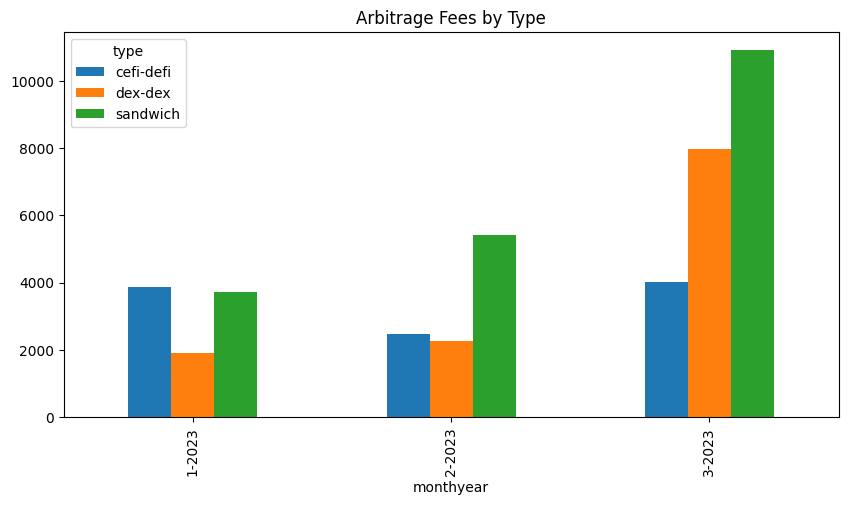

In [49]:
df.pivot(index='monthyear', columns='type', values='fees').plot(kind='bar', figsize=(10, 5), title='Arbitrage Fees by Type')

In [50]:
df

,monthyear,total_count,fees,type
0,3-2023,317912,4016.230784,cefi-defi
1,1-2023,348002,3872.739006,cefi-defi
2,2-2023,338363,2466.207151,cefi-defi
0,1-2023,108090,1897.528552,dex-dex
1,3-2023,185167,7976.309199,dex-dex
2,2-2023,104848,2273.302722,dex-dex
0,2-2023,215466,5413.872086,sandwich
1,1-2023,191227,3709.750835,sandwich
2,3-2023,334623,10908.640392,sandwich


In [51]:
df_mev = df.groupby('monthyear').sum()

/var/folders/vm/n0lnd6g946l4l6jlzv2954m40000gn/T/ipykernel_81477/2746753086.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mev = df.groupby('monthyear').sum()


In [52]:
df_mev

,total_count,fees
monthyear,,
1-2023,647319,9480.018394
2-2023,658677,10153.381959
3-2023,837702,22901.180375


In [53]:
df_total

,monthyear,total_count,fees
0,3-2023,33108540,32479.541641
1,2-2023,29793399,21143.291638
2,1-2023,31118582,21874.636998


In [40]:
df_others = df_total.groupby('monthyear').sum()['fees'] - df_mev['fees']


monthyear
1-2023     16104.36944
2-2023    16403.781764
3-2023    20487.001658
type            others
Name: fees, dtype: object

In [15]:
df_total = df_total.join(df_mev, on='monthyear', rsuffix='_mev')
df_total['pct_fees'] = 100*df_total['fees_mev']/df_total['fees']

In [17]:
df_total

,monthyear,total_count,fees,total_count_mev,fees_mev,pct_fees
0,2-2023,29793399,21143.291638,443211,4739.509873,22.416140
1,1-2023,31118582,21874.636998,456092,5770.267559,26.378804
2,3-2023,33108540,32479.541641,503079,11992.539983,36.923366


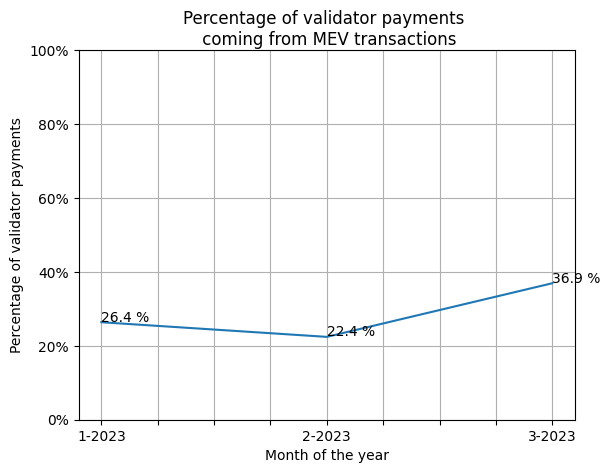

In [18]:
new_order = ['1-2023', '2-2023', '3-2023']
to_plot = df_total.set_index('monthyear')
to_plot = to_plot.reindex(new_order, axis=0)
ax2 = to_plot['pct_fees'].plot(grid=True)
ax2.set_title('Percentage of validator payments \n coming from MEV transactions', wrap=True)
ax2.set_xlabel('Month of the year')
ax2.set_ylabel('Percentage of validator payments')
ax2.set_ylim(0, 100)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

for id, val in enumerate(to_plot['pct_fees']):
    ax2.text(id, val+0.2, "{:.1f} %".format(val))